<a href="https://colab.research.google.com/github/DAVIDnHANG/DS-Unit-2-Regression-Classification/blob/master/module2/DS_Unit_2_Regression_Classification_turnin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) why am i multiply y_pred * N? N =populaiton of sample
then we are putting it in mean_absolute error = SSE / N)

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv('https://raw.githubusercontent.com/DAVIDnHANG/DS-Unit-2-Regression-Classification/master/data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

**The steps to pick out the date are the following:**

# Subset of April-May and then another df of June
1.   convert to to_datetime format. turn into pandas, numpy format
2.   mask. 
3.   then .loc all dates. in other words, a filter.

In [0]:
import datetime as dt
import pandas as pd
df['created'] = pd.to_datetime(df['created'])
start_date = '2016-04-01'
end_date = '2016-05-30'
mask = (df['created'] > start_date) & (df['created'] <=end_date)
train_Date_ap_may = df.loc[mask]

In [22]:
start_date = '2016-06-01'
end_date = '2016-06-30'

maskJune = (df['created'] > start_date) & (df['created'] <= end_date)
test_Date_June = df.loc[maskJune]
test_Date_June.columns


Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

**Mean of what I am looking at**
Given the price of apartments right now, I want to know the best predicter for price with no other influence. So let examine price for May-April, then look at price again for June.

In [34]:
from sklearn.metrics import mean_absolute_error
#Since we are looking at y, we want price to be in the y-axis.
target = 'price'
y_train = train_Date_ap_may[target]
y_test = test_Date_June[target]

#get the mean of the training data then get the
#Since this is the population mean we use N, if this is SAMPLE, we use n-2
y_pred = [y_train.mean()] * len(y_train)
mae_train = mean_absolute_error(y_train, y_pred)

y_predtest = [y_train.mean()] * len(y_test)
mae_test = mean_absolute_error(y_test, y_predtest)

print("MAE for Train. In April-May, The price is about", mae_train, "more" )
print("MAE for test. in June, The price is about", mae_test, "more")

MAE for Train. In April-May, The price is about 1202.912286394699 more
MAE for test. in June, The price is about 1197.7032731340475 more


**do the 5 steps to of linear regression on python.**


*   instanteous linear regression
*   assign features and target
*   fit the model




In [41]:
#[ ] Engineer at least two new features. high_speed_internet       and common_outdoor_space      
from sklearn.linear_model import LinearRegression
# 1) instanteous the model
model = LinearRegression()
#2) train, and features (train on the dataframe of April-May date) 
#split into two, train data and target data
features = ['high_speed_internet', 'bathrooms', 'bedrooms']
X_train = train_Date_ap_may[features]
X_test = test_Date_June[features]
print(f'The features will be,', features)
#3) fit with at least two features
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
print(train_mae)

#4) now test
y_test_model = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_model )
print(test_mae)

The features will be, ['high_speed_internet', 'bathrooms', 'bedrooms']
817.840525712477
824.9354844292876


MAE is about 817 dollar off for training, and MAE 824 dollar off for test.

In [42]:
coeff_df = pd.DataFrame(model.coef_, X_train.columns, columns = ['Coefficient']) 
print(coeff_df)
print(model.intercept_)

                     Coefficient
high_speed_internet   169.641216
bathrooms            2067.317672
bedrooms              388.784952
478.3510604387425


$y=461.26 + 161.16 x_1 + 2091.50 x_2 + 384.28 x_3$

the intercept is $b_o = 461$ in the eq $y=b_o + b_1 x_1 + b_2 x_2 + b_3 x_3$ 
the $b_1, b_2, b_3$ are the coefficient

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
#now let get the RMSE, MAE, and R^2 for the baseline.
feature = ['high_speed_internet']
x_two = train_Date_ap_may[feature]
y_two = train_Date_ap_may[target]
b= y_train.mean()
m=0
y_pred_two = m*x_two + b

mse_base = mean_squared_error(y_two, y_pred_two) 
rmse_base = np.sqrt(mse_base)
mae_base = mean_absolute_error(y_two, y_pred_two)
r2_base = r2_score(y_two, y_pred_two)
print(mse_base, rmse_base ,mae_base,r2_base)

3110044.942999077 1763.5319512271608 1202.912286394699 0.0


Mean squared error is useless because 3 million price 
difference as a base in new york?


square rooting the Mean square error is more useful because the variance is about 1763.53 dollar.


All the error add up to 1202 dollar.

In [89]:
feature = ['high_speed_internet']
x_test_t = test_Date_June[feature]
y_test_t = test_Date_June[target]
b_test= y_test.mean()
m=0
y_pred_test_two = m*x_test_t + b_test


mse_base_test = mean_squared_error(y_test_t, y_pred_test_two) 
rmse_base_test = np.sqrt(mse_base)
mae_base_test = mean_absolute_error(y_test_t, y_pred_test_two)
r2_base_test = r2_score(y_test_t, y_pred_test_two)
print(mse_base_test,rmse_base_test,mae_base_test,r2_base_test)

3108021.267852562 1763.5319512271608 1200.8695333832386 0.0


test linear_regression on train data.

In [94]:

y_prediction_mul = model.predict(train_Date_ap_may[features])



mse_forMulti = mean_squared_error(y_two,y_prediction_mul)
rmse_forMulti = np.sqrt(mse_forMulti)
mae_base_test = mean_absolute_error(y_two,y_prediction_mul )
r2_base_test = r2_score(y_two,y_prediction_mul)
print(mse_forMulti,rmse_forMulti,mae_base_test, r2_base_test)

1516400.2341841555 1231.4220373958537 817.840525712477 0.512418546362915


In [0]:
# 

real test on june


In [95]:
y_test_multi = model.predict(test_Date_June[features])

mse_base_test_multi = mean_squared_error(y_test_t, y_test_multi) 
rmse_base_test_multi = np.sqrt(mse_base)
mae_base_test_multi = mean_absolute_error(y_test_t, y_test_multi)
r2_base_test_multi = r2_score(y_test_t, y_test_multi)
print(mse_base_test,rmse_base_test,mae_base_test,r2_base_test)

3108021.267852562 1763.5319512271608 817.840525712477 0.512418546362915


AttributeError: ignored

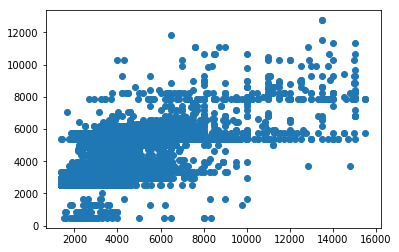

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test_t,y_test_multi)
ax.plt([y_test_t.min(), y_test_t.max()], [y_test_t.min(), y_test_t.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()